In [1]:
from functions.functions import *
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True" # This is to avoid the memory fragmentation

# Retina display
%config InlineBackend.figure_format = 'retina'

In [2]:
device

device(type='cuda')

In [3]:
# Loading and preprocessing the image
#img_path = "dog.jpg"  # Make sure this path is correct
#original_img = load_and_preprocess_image(img_path)
img_path = "Lenna.png"
if not (os.path.exists(img_path)):
  !wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -O "Lenna.png"
original_img = load_and_preprocess_image(img_path, top = 0 , left = 0 , crop_size=512)


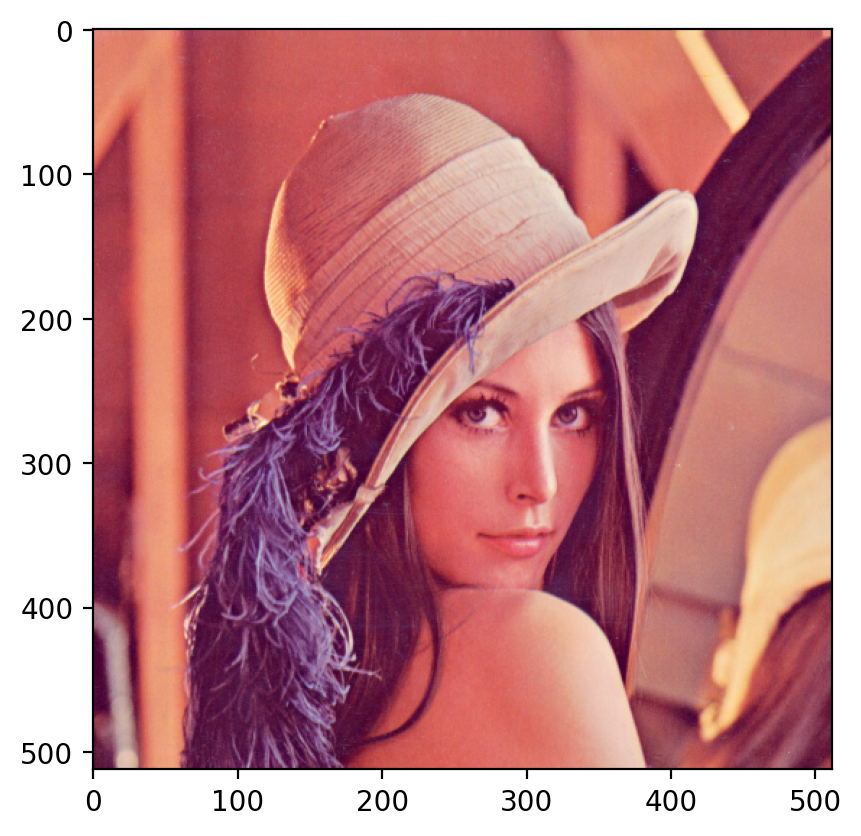

In [4]:
plt.imshow(rearrange(original_img, 'c h w -> h w c').numpy())

In [5]:
X, Y = (create_coordinate_map(original_img))
scaled_X, scaler = scale_coordinates(X)

In [6]:
scaled_X.shape, Y.shape

(torch.Size([262144, 2]), torch.Size([262144, 3]))

In [7]:
X_rff = create_rff_features(scaled_X, 20000, 0.008).to(device)

In [9]:
net = LinearModel(X_rff.shape[1], 3).to(device)
train(net, 0.005, X_rff.to(device), Y.to(device), 1000)

Epoch 0 loss: 0.302498


Epoch 100 loss: 0.037853
Epoch 200 loss: 0.008905
Epoch 300 loss: 0.004639
Epoch 400 loss: 0.003120
Epoch 500 loss: 0.002324
Epoch 600 loss: 0.001877
Epoch 700 loss: 0.001621
Epoch 800 loss: 0.001474
Epoch 900 loss: 0.001389


0.001339870854280889

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


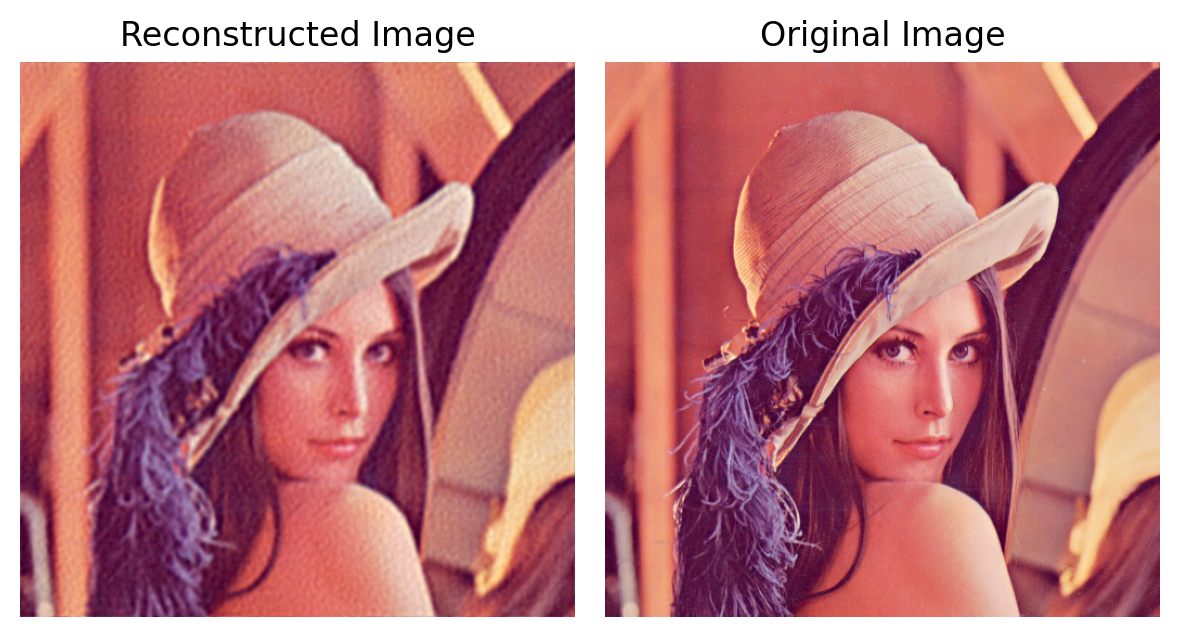

In [10]:
_ = plot_reconstructed_and_original_image(original_img, net, X_rff, title="")

In [11]:
metrics = calculate_metrics(Y.to(device), predict_image(net, X_rff))
print(f"RMSE: {metrics[0]:.6f}, PSNR: {metrics[1]:.6f}")

RMSE: 0.036599, PSNR: 28.730591
